<div style="direction: rtl; width=100%;text-align:right;">

# למידת מכונה/אינטיליגנציה מלאכותית  - המדריך הפרקטי
--------------------------------------
# 1. מבוא

## לפני שמתחילים
###### לפני שנתחיל, כמה כלים שיעזרו לנו: מחברת פייטון הידועה גם בשם מחברת jupyter (זו אינה שגיאת כתיב), סביבת עבודה בענן בה נוכל לפתח בלי להתקין כלום, וכמובן שפת פייטון השפה דה פקטו לכתוב קוד למידת מכונה 

### א. קיצורים
###### בהרבה מקומות נשתמש בקיצורים הבאים: ML - Machine Learninf (למידת מכונה) ו AI - Artificial Inteligence (אינטיליגציה מלאכותית)

### ב. IPython ( jupyter) notebook
###### אם תגללו למטה תראו שדף זה בנוי משני סוגי תאים - תאים של טקסט (נקרא markdown) ותאים של קוד פייטון. מחברת פיטון כזאת מקובלת בהרבה אתרים העוסקים בלמידת מכונה
### ג. סביבת פיתוח בענן
###### בכדי לפתח נצטרך סביבת עבודה, לשימחתנו [גוגל מספקים אחת כזאת ](https://colab.research.google.com/ "goole colab") בענן ו[דוגמאות](https://github.com/tensorflow/workshops)  עם שמירה ב google-docs ואפילו מאפשרים האצה בGPU.

### ד. TensorFlow ( או TF)
###### זוהי ספריית פייטון מבית גוגל (קוד פתוח), המיועדת ללמידת מכונה ובעיקר רשתות ניורונים. היא מתחילה מבסיס שהוא ה"אסמבלי" של ML ומכילה רמות גבוהות יותר כמו Keras המקבילה לשפה עילית. נפגוש אותה בהמשך

### ה. שפת Python
###### אני לא אכנס פה ללימוד שפת פייטון, אני מניח שאדם שתכנת בשפה זו או אחרת יוכל להבין וללמוד תוך כדי. בנוסף ישנם באינטרנט אין ספור מדריכים לפייטון
###### למי שמגיע משפת תכנות אחרת, אציין שהדבר ה"מוזר" בפייטון הינו שאם בשפות אחרות אינדנטציה היא בשביל קריאות הקוד ואינה משפיעה על פעולתו, בפיטון אינדנטציה היא חובה.
###### שימו לב להבדל בין:

</div >

In [1]:
for i in range(5):
    print(i)
    print("good night")

0
good night
1
good night
2
good night
3
good night
4
good night


<div style="direction: rtl; width=100%;text-align:right;">

###### לבין:

</div >

In [2]:
for i in range(5):
    print(i)
print("good night")

0
1
2
3
4
good night


<div style="direction: rtl; width=100%;text-align:right;">

###### טוב, אנחנו מוכנים, אז נתחיל

# רגרסיה ליניארית
###### נייצר לנו נתונים (ונלמד קצת פייטון בדרך):
###### נתחיל בייבוא הספריות אותם אנו צריכים:
</div >

In [3]:
import matplotlib.pyplot as plt # for graphs
import numpy as np # for calculations

<div style="direction: rtl; width=100%;text-align:right;">

###### נגדיר פונקציה בשם gen_data שתייצר לנו את הנתונים. שימו לב שאנחנו מייצרים קו ישר שמוגדר ע"י השיפוע M ונקודת החיתוך עם ציר ה Y - שהיא N:
</div >

In [4]:
def gen_data():
    x=np.arange(10.0) # x=[0.0, 1.0, ... , 9.0] - 10 numbers
    print("x=",x)

    M=-0.7 # slope
    N=1.1 # y-axis intersect
    print("M=",M)
    print("N=",N)

    y=x*M+N
    print("y=",y)
    return x,y



<div style="direction: rtl; width=100%;text-align:right;">

###### נריץ את gen_data ונשמור את הערכים שמחזירה לתוך a  ו b:

</div >

In [5]:
print("printed output of gen_data:")
a,b=gen_data()

print("")
print("after gen_data")
print("a is:")
a # this will be shown as Out[]: array ...

printed output of gen_data:
x= [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
M= -0.7
N= 1.1
y= [ 1.1  0.4 -0.3 -1.  -1.7 -2.4 -3.1 -3.8 -4.5 -5.2]

after gen_data
a is:


array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

<div style="direction: rtl; width=100%;text-align:right;">

###### שימו לב שהמשתנים בתוך הפונקציה x,y,m,n אינם נגישים בחוץ, ואילו בחוץ ישנם המשתנים a ו b (נתתי שמות שונים בכוונה להמחיש את ההבדל)
###### עכשיו נציג את a ו b בגרף בעזרת הפונקציה שיצרנו קודם - plot_data

</div >

<div style="direction: rtl; width=100%;text-align:right;">

###### נגדיר פונקציה בשם plot_data שתצייר לנו את הנתונים:

</div >

In [6]:
def plot_data(x,y,flags='o',title='A Graph',y2=[],flags2="ro"):
    if (len(y2)):
        plt.plot(x, y,flags,x,y2,flags2) # 2 graphs
    else:
        plt.plot(x, y,flags) # 1 graph
    plt.xlabel('X - axis')
    plt.ylabel('Y - axis')
    plt.title(title)
    plt.grid(True)
    #plt.savefig("test.png")
    plt.show()
    


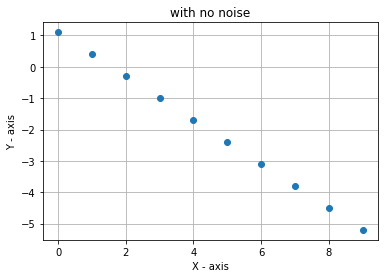

In [7]:
plot_data(a,b,title='with no noise')

<div style="direction: rtl; width=100%;text-align:right;">

###### נוסיף קצת רעש ונצייר שוב:

</div >

b= [ 1.1  0.4 -0.3 -1.  -1.7 -2.4 -3.1 -3.8 -4.5 -5.2]
noise= [ 0.23262208  0.87000639 -0.76150234  0.27937864  0.39591354 -0.35041144
 -0.95208116  0.20053968  0.32522761 -0.41670152]
b+noise= [ 1.33262208  1.27000639 -1.06150234 -0.72062136 -1.30408646 -2.75041144
 -4.05208116 -3.59946032 -4.17477239 -5.61670152]


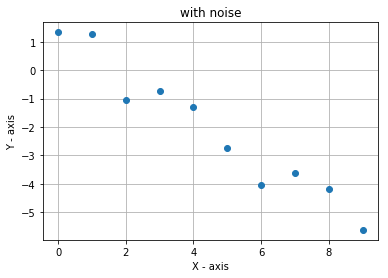

In [8]:
noise=np.random.random(len(b)) # retruns array of values between 0.0 and 1.0
noise=(noise-0.5) # now is array in range -0.5 to 0.5
noise=noise*2 # now is array in range -1 to 1

print("b=",b)
print("noise=",noise)
b_with_noise=b+noise
print("b+noise=",b_with_noise)

plot_data(a,b_with_noise,title='with noise')


<div style="direction: rtl; width=100%;text-align:right;">

###### , נלמד קצת על TensorFlow לפני שנשתמש ברגרסיה ליניארית לנסות לשחזר לנו את הקו המקורי:

</div >

<div style="direction: rtl; width=100%;text-align:right;">

# TensorFlow

###### בסיס: ב TensorFlow אנחנו מגדירים קודם את הבעיה בלי לפתור אותה ורק אח"כ מחשבים. לדוגמא:
</div >

In [9]:
import tensorflow as tf

#define problem 2.0*3.0

#c1=2.0
c1 = tf.constant(2.0)

#c2=3.0
c2 = tf.constant(3.0)


#mul1=c1*c2
mul1 = c1 * c2

# Start tf session
sess = tf.Session()


print("c1 is ",c1,"with value ",sess.run(c1))
print("c2 is ",c2,"with value ",sess.run(c2))
print("mul1 is ",mul1)
  

    
# solve to problem
res=sess.run(mul1)
print("res:",res)

#close the session
sess.close();


c1 is  Tensor("Const:0", shape=(), dtype=float32) with value  2.0
c2 is  Tensor("Const_1:0", shape=(), dtype=float32) with value  3.0
mul1 is  Tensor("mul:0", shape=(), dtype=float32)
res: 6.0


<div style="direction: rtl; width=100%;text-align:right;">

##### להרחבה ניתן לצפות [בסרטון הבא](https://www.youtube.com/watch?v=yX8KuPZCAMo) (באנגלית)

#### בחזרה לרגרסיה הליניארית:
###### אנחנו רוצים למצוא את M ו N. קודם נגדיר אותם כ Variables ונאתחל אותם לערך כלשהו לדוגמא 0.5, יותר מאוחר נמצא את הערכים שלהם

</div >

In [10]:
M=tf.Variable([0.5],tf.float32)
N=tf.Variable([0.5],tf.float32)

<div style="direction: rtl; width=100%;text-align:right;">

###### נגדיר מקום להכניס את הנתונים שיצרנו קודם ונקרא להם X ו Y (רק נגדיר מקום. את הנתונים נכניס אח"כ)
</div >

In [11]:
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

<div style="direction: rtl; width=100%;text-align:right;">

###### נחשב את הקו הישר Calculated_Y ואת LOSS - הטעות בין Calculated_Y  שחישבנו מהנתונים לנתונים עצמם:
</div >

In [12]:
Calculated_Y=X*M+N

loss_vector=Y-Calculated_Y
loss=tf.reduce_sum(tf.square(loss_vector)) # sum of square of delta Y.

<div style="direction: rtl; width=100%;text-align:right;">

###### נאתחל את המשתנים הגלובליים:
</div >

In [13]:
init=tf.global_variables_initializer()

<div style="direction: rtl; width=100%;text-align:right;">

###### נבחר באופטימייזר מסוג gardient descent (לא נרחיב עליו עכשיו) עם מקדם קפיצה של 0.002 ונבקש ממנו לנסות להקטין את LOSS למינימום:
</div >

In [14]:
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

<div style="direction: rtl; width=100%;text-align:right;">

###### נריץ 10 איטרציות בהם האופטימיזר ינסה לתקן את M ו N בכדי להקטין את ריבועי מרחקי הנקודות מהקו
</div >

In [15]:
with tf.Session() as sess: # auto close the session 
    sess.run(init)
    iterations=5000
    for i in range(iterations): #run iterations
        print("running batch %d/%d:" % (i+1,iterations))
        sess.run(train,{ X:a,Y:b_with_noise}); #optimize with x taken from a, and y taken from b+noise
        #print("  Estimated M=",sess.run(M))
        #print("  Estimated N=",sess.run(N))
    m_res=sess.run(M)
    n_res=sess.run(N)
            

running batch 1/5000:
running batch 2/5000:
running batch 3/5000:
running batch 4/5000:
running batch 5/5000:
running batch 6/5000:
running batch 7/5000:
running batch 8/5000:
running batch 9/5000:
running batch 10/5000:
running batch 11/5000:
running batch 12/5000:
running batch 13/5000:
running batch 14/5000:
running batch 15/5000:
running batch 16/5000:
running batch 17/5000:
running batch 18/5000:
running batch 19/5000:
running batch 20/5000:
running batch 21/5000:
running batch 22/5000:
running batch 23/5000:
running batch 24/5000:
running batch 25/5000:
running batch 26/5000:
running batch 27/5000:
running batch 28/5000:
running batch 29/5000:
running batch 30/5000:
running batch 31/5000:
running batch 32/5000:
running batch 33/5000:
running batch 34/5000:
running batch 35/5000:
running batch 36/5000:
running batch 37/5000:
running batch 38/5000:
running batch 39/5000:
running batch 40/5000:
running batch 41/5000:
running batch 42/5000:
running batch 43/5000:
running batch 44/500

running batch 374/5000:
running batch 375/5000:
running batch 376/5000:
running batch 377/5000:
running batch 378/5000:
running batch 379/5000:
running batch 380/5000:
running batch 381/5000:
running batch 382/5000:
running batch 383/5000:
running batch 384/5000:
running batch 385/5000:
running batch 386/5000:
running batch 387/5000:
running batch 388/5000:
running batch 389/5000:
running batch 390/5000:
running batch 391/5000:
running batch 392/5000:
running batch 393/5000:
running batch 394/5000:
running batch 395/5000:
running batch 396/5000:
running batch 397/5000:
running batch 398/5000:
running batch 399/5000:
running batch 400/5000:
running batch 401/5000:
running batch 402/5000:
running batch 403/5000:
running batch 404/5000:
running batch 405/5000:
running batch 406/5000:
running batch 407/5000:
running batch 408/5000:
running batch 409/5000:
running batch 410/5000:
running batch 411/5000:
running batch 412/5000:
running batch 413/5000:
running batch 414/5000:
running batch 41

running batch 878/5000:
running batch 879/5000:
running batch 880/5000:
running batch 881/5000:
running batch 882/5000:
running batch 883/5000:
running batch 884/5000:
running batch 885/5000:
running batch 886/5000:
running batch 887/5000:
running batch 888/5000:
running batch 889/5000:
running batch 890/5000:
running batch 891/5000:
running batch 892/5000:
running batch 893/5000:
running batch 894/5000:
running batch 895/5000:
running batch 896/5000:
running batch 897/5000:
running batch 898/5000:
running batch 899/5000:
running batch 900/5000:
running batch 901/5000:
running batch 902/5000:
running batch 903/5000:
running batch 904/5000:
running batch 905/5000:
running batch 906/5000:
running batch 907/5000:
running batch 908/5000:
running batch 909/5000:
running batch 910/5000:
running batch 911/5000:
running batch 912/5000:
running batch 913/5000:
running batch 914/5000:
running batch 915/5000:
running batch 916/5000:
running batch 917/5000:
running batch 918/5000:
running batch 91

running batch 1268/5000:
running batch 1269/5000:
running batch 1270/5000:
running batch 1271/5000:
running batch 1272/5000:
running batch 1273/5000:
running batch 1274/5000:
running batch 1275/5000:
running batch 1276/5000:
running batch 1277/5000:
running batch 1278/5000:
running batch 1279/5000:
running batch 1280/5000:
running batch 1281/5000:
running batch 1282/5000:
running batch 1283/5000:
running batch 1284/5000:
running batch 1285/5000:
running batch 1286/5000:
running batch 1287/5000:
running batch 1288/5000:
running batch 1289/5000:
running batch 1290/5000:
running batch 1291/5000:
running batch 1292/5000:
running batch 1293/5000:
running batch 1294/5000:
running batch 1295/5000:
running batch 1296/5000:
running batch 1297/5000:
running batch 1298/5000:
running batch 1299/5000:
running batch 1300/5000:
running batch 1301/5000:
running batch 1302/5000:
running batch 1303/5000:
running batch 1304/5000:
running batch 1305/5000:
running batch 1306/5000:
running batch 1307/5000:


running batch 1661/5000:
running batch 1662/5000:
running batch 1663/5000:
running batch 1664/5000:
running batch 1665/5000:
running batch 1666/5000:
running batch 1667/5000:
running batch 1668/5000:
running batch 1669/5000:
running batch 1670/5000:
running batch 1671/5000:
running batch 1672/5000:
running batch 1673/5000:
running batch 1674/5000:
running batch 1675/5000:
running batch 1676/5000:
running batch 1677/5000:
running batch 1678/5000:
running batch 1679/5000:
running batch 1680/5000:
running batch 1681/5000:
running batch 1682/5000:
running batch 1683/5000:
running batch 1684/5000:
running batch 1685/5000:
running batch 1686/5000:
running batch 1687/5000:
running batch 1688/5000:
running batch 1689/5000:
running batch 1690/5000:
running batch 1691/5000:
running batch 1692/5000:
running batch 1693/5000:
running batch 1694/5000:
running batch 1695/5000:
running batch 1696/5000:
running batch 1697/5000:
running batch 1698/5000:
running batch 1699/5000:
running batch 1700/5000:


running batch 2046/5000:
running batch 2047/5000:
running batch 2048/5000:
running batch 2049/5000:
running batch 2050/5000:
running batch 2051/5000:
running batch 2052/5000:
running batch 2053/5000:
running batch 2054/5000:
running batch 2055/5000:
running batch 2056/5000:
running batch 2057/5000:
running batch 2058/5000:
running batch 2059/5000:
running batch 2060/5000:
running batch 2061/5000:
running batch 2062/5000:
running batch 2063/5000:
running batch 2064/5000:
running batch 2065/5000:
running batch 2066/5000:
running batch 2067/5000:
running batch 2068/5000:
running batch 2069/5000:
running batch 2070/5000:
running batch 2071/5000:
running batch 2072/5000:
running batch 2073/5000:
running batch 2074/5000:
running batch 2075/5000:
running batch 2076/5000:
running batch 2077/5000:
running batch 2078/5000:
running batch 2079/5000:
running batch 2080/5000:
running batch 2081/5000:
running batch 2082/5000:
running batch 2083/5000:
running batch 2084/5000:
running batch 2085/5000:


running batch 2437/5000:
running batch 2438/5000:
running batch 2439/5000:
running batch 2440/5000:
running batch 2441/5000:
running batch 2442/5000:
running batch 2443/5000:
running batch 2444/5000:
running batch 2445/5000:
running batch 2446/5000:
running batch 2447/5000:
running batch 2448/5000:
running batch 2449/5000:
running batch 2450/5000:
running batch 2451/5000:
running batch 2452/5000:
running batch 2453/5000:
running batch 2454/5000:
running batch 2455/5000:
running batch 2456/5000:
running batch 2457/5000:
running batch 2458/5000:
running batch 2459/5000:
running batch 2460/5000:
running batch 2461/5000:
running batch 2462/5000:
running batch 2463/5000:
running batch 2464/5000:
running batch 2465/5000:
running batch 2466/5000:
running batch 2467/5000:
running batch 2468/5000:
running batch 2469/5000:
running batch 2470/5000:
running batch 2471/5000:
running batch 2472/5000:
running batch 2473/5000:
running batch 2474/5000:
running batch 2475/5000:
running batch 2476/5000:


running batch 2810/5000:
running batch 2811/5000:
running batch 2812/5000:
running batch 2813/5000:
running batch 2814/5000:
running batch 2815/5000:
running batch 2816/5000:
running batch 2817/5000:
running batch 2818/5000:
running batch 2819/5000:
running batch 2820/5000:
running batch 2821/5000:
running batch 2822/5000:
running batch 2823/5000:
running batch 2824/5000:
running batch 2825/5000:
running batch 2826/5000:
running batch 2827/5000:
running batch 2828/5000:
running batch 2829/5000:
running batch 2830/5000:
running batch 2831/5000:
running batch 2832/5000:
running batch 2833/5000:
running batch 2834/5000:
running batch 2835/5000:
running batch 2836/5000:
running batch 2837/5000:
running batch 2838/5000:
running batch 2839/5000:
running batch 2840/5000:
running batch 2841/5000:
running batch 2842/5000:
running batch 2843/5000:
running batch 2844/5000:
running batch 2845/5000:
running batch 2846/5000:
running batch 2847/5000:
running batch 2848/5000:
running batch 2849/5000:


running batch 3172/5000:
running batch 3173/5000:
running batch 3174/5000:
running batch 3175/5000:
running batch 3176/5000:
running batch 3177/5000:
running batch 3178/5000:
running batch 3179/5000:
running batch 3180/5000:
running batch 3181/5000:
running batch 3182/5000:
running batch 3183/5000:
running batch 3184/5000:
running batch 3185/5000:
running batch 3186/5000:
running batch 3187/5000:
running batch 3188/5000:
running batch 3189/5000:
running batch 3190/5000:
running batch 3191/5000:
running batch 3192/5000:
running batch 3193/5000:
running batch 3194/5000:
running batch 3195/5000:
running batch 3196/5000:
running batch 3197/5000:
running batch 3198/5000:
running batch 3199/5000:
running batch 3200/5000:
running batch 3201/5000:
running batch 3202/5000:
running batch 3203/5000:
running batch 3204/5000:
running batch 3205/5000:
running batch 3206/5000:
running batch 3207/5000:
running batch 3208/5000:
running batch 3209/5000:
running batch 3210/5000:
running batch 3211/5000:


running batch 3521/5000:
running batch 3522/5000:
running batch 3523/5000:
running batch 3524/5000:
running batch 3525/5000:
running batch 3526/5000:
running batch 3527/5000:
running batch 3528/5000:
running batch 3529/5000:
running batch 3530/5000:
running batch 3531/5000:
running batch 3532/5000:
running batch 3533/5000:
running batch 3534/5000:
running batch 3535/5000:
running batch 3536/5000:
running batch 3537/5000:
running batch 3538/5000:
running batch 3539/5000:
running batch 3540/5000:
running batch 3541/5000:
running batch 3542/5000:
running batch 3543/5000:
running batch 3544/5000:
running batch 3545/5000:
running batch 3546/5000:
running batch 3547/5000:
running batch 3548/5000:
running batch 3549/5000:
running batch 3550/5000:
running batch 3551/5000:
running batch 3552/5000:
running batch 3553/5000:
running batch 3554/5000:
running batch 3555/5000:
running batch 3556/5000:
running batch 3557/5000:
running batch 3558/5000:
running batch 3559/5000:
running batch 3560/5000:


running batch 3887/5000:
running batch 3888/5000:
running batch 3889/5000:
running batch 3890/5000:
running batch 3891/5000:
running batch 3892/5000:
running batch 3893/5000:
running batch 3894/5000:
running batch 3895/5000:
running batch 3896/5000:
running batch 3897/5000:
running batch 3898/5000:
running batch 3899/5000:
running batch 3900/5000:
running batch 3901/5000:
running batch 3902/5000:
running batch 3903/5000:
running batch 3904/5000:
running batch 3905/5000:
running batch 3906/5000:
running batch 3907/5000:
running batch 3908/5000:
running batch 3909/5000:
running batch 3910/5000:
running batch 3911/5000:
running batch 3912/5000:
running batch 3913/5000:
running batch 3914/5000:
running batch 3915/5000:
running batch 3916/5000:
running batch 3917/5000:
running batch 3918/5000:
running batch 3919/5000:
running batch 3920/5000:
running batch 3921/5000:
running batch 3922/5000:
running batch 3923/5000:
running batch 3924/5000:
running batch 3925/5000:
running batch 3926/5000:


running batch 4277/5000:
running batch 4278/5000:
running batch 4279/5000:
running batch 4280/5000:
running batch 4281/5000:
running batch 4282/5000:
running batch 4283/5000:
running batch 4284/5000:
running batch 4285/5000:
running batch 4286/5000:
running batch 4287/5000:
running batch 4288/5000:
running batch 4289/5000:
running batch 4290/5000:
running batch 4291/5000:
running batch 4292/5000:
running batch 4293/5000:
running batch 4294/5000:
running batch 4295/5000:
running batch 4296/5000:
running batch 4297/5000:
running batch 4298/5000:
running batch 4299/5000:
running batch 4300/5000:
running batch 4301/5000:
running batch 4302/5000:
running batch 4303/5000:
running batch 4304/5000:
running batch 4305/5000:
running batch 4306/5000:
running batch 4307/5000:
running batch 4308/5000:
running batch 4309/5000:
running batch 4310/5000:
running batch 4311/5000:
running batch 4312/5000:
running batch 4313/5000:
running batch 4314/5000:
running batch 4315/5000:
running batch 4316/5000:


running batch 4656/5000:
running batch 4657/5000:
running batch 4658/5000:
running batch 4659/5000:
running batch 4660/5000:
running batch 4661/5000:
running batch 4662/5000:
running batch 4663/5000:
running batch 4664/5000:
running batch 4665/5000:
running batch 4666/5000:
running batch 4667/5000:
running batch 4668/5000:
running batch 4669/5000:
running batch 4670/5000:
running batch 4671/5000:
running batch 4672/5000:
running batch 4673/5000:
running batch 4674/5000:
running batch 4675/5000:
running batch 4676/5000:
running batch 4677/5000:
running batch 4678/5000:
running batch 4679/5000:
running batch 4680/5000:
running batch 4681/5000:
running batch 4682/5000:
running batch 4683/5000:
running batch 4684/5000:
running batch 4685/5000:
running batch 4686/5000:
running batch 4687/5000:
running batch 4688/5000:
running batch 4689/5000:
running batch 4690/5000:
running batch 4691/5000:
running batch 4692/5000:
running batch 4693/5000:
running batch 4694/5000:
running batch 4695/5000:


running batch 4994/5000:
running batch 4995/5000:
running batch 4996/5000:
running batch 4997/5000:
running batch 4998/5000:
running batch 4999/5000:
running batch 5000/5000:


<div style="direction: rtl; width=100%;text-align:right;">

###### נצייר את הקו עבור ה M ו ה N שקיבלנו באדום ואת המקורי בכחול:
</div >

calculated M,N: [-0.75628835] [1.3355938]
new_y= [ 1.33559382  0.57930547 -0.17698288 -0.93327123 -1.68955958 -2.44584793
 -3.20213628 -3.95842463 -4.71471298 -5.47100133]


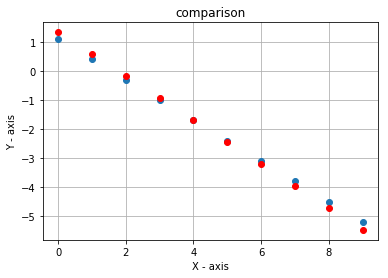

In [16]:
print("calculated M,N:",m_res,n_res)
new_y=m_res*a+n_res;
print("new_y=",new_y)
plot_data(a,b,y2=new_y,title='comparison')

<div style="direction: rtl; width=100%;text-align:right;">

###### ניתן לראות שלמרות הרעש שהכנסנו, הצלחנו לשערך לא רע את הקו המקורי:
</div >